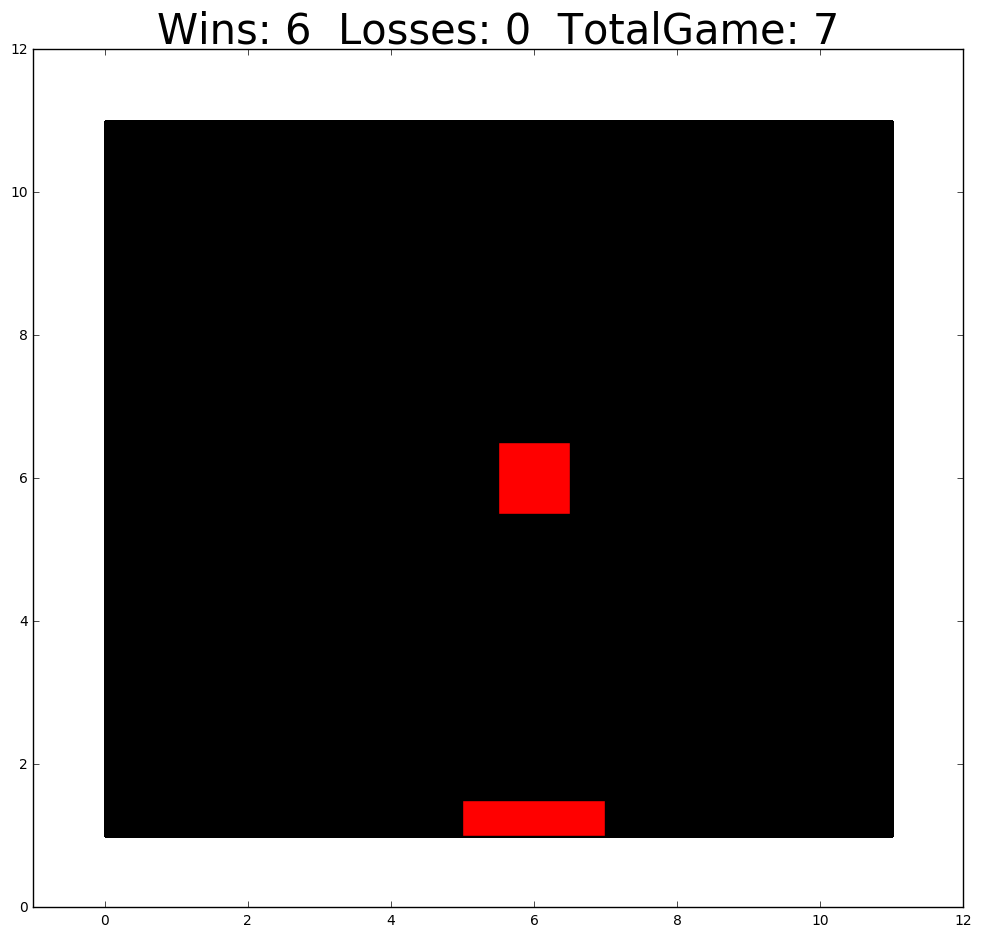

In [ ]:
# To run this code you must use iPython. Also you can use the .ipynb file in ipython notebook mode.

%matplotlib
%matplotlib inline

from TrainCatchGame import CatchEnvironment, X, W1, b1, input_layer, W2, b2, hidden_layer, W3, b3, output_layer, Y, cost, optimizer
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pylab as pl
import time
import tensorflow as tf
import math
import os


gridSize = 10 # The size of the grid that the agent is going to play the game on.
maxGames = 100
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0

ground = 1
plot = pl.figure(figsize=(12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

def drawState(fruitRow, fruitColumn, basket):
    global gridSize
    # column is the x axis
    fruitX = fruitColumn 
    # Invert matrix style points to coordinates
    fruitY = (gridSize - fruitRow + 1)
    statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  TotalGame: " + str(numberOfGames)
    axis.set_title(statusTitle, fontsize=30)
    for p in [
    patches.Rectangle(
        ((ground - 1), (ground)), 11, 10,
        facecolor="#000000"      # Black
    ),
    patches.Rectangle(
        (basket - 1, ground), 2, 0.5,
        facecolor="#FF0000"     # No background
    ),
    patches.Rectangle(
        (fruitX - 0.5, fruitY - 0.5), 1, 1,
        facecolor="#FF0000"       # red 
    ),   
    ]:
        axis.add_patch(p)
    display.clear_output(wait=True)
    display.display(pl.gcf())


with tf.Session() as sess:    
    # Restore variables from disk.
    saver.restore(sess, os.getcwd()+"/model.ckpt")
    print('saved model is loaded!')

    while (numberOfGames < maxGames):
        numberOfGames = numberOfGames + 1

        # The initial state of the environment.
        isGameOver = False
        fruitRow, fruitColumn, basket = env.reset()
        currentState = env.observe()
        drawState(fruitRow, fruitColumn, basket)

        while (isGameOver != True):
            # Forward the current state through the network.
            q = sess.run(output_layer, feed_dict={X: currentState})
            # Find the max index (the chosen action).
            index = q.argmax()
            action = index + 1
            nextState, reward, gameOver, stateInfo = env.act(action)    
            fruitRow = stateInfo[0]
            fruitColumn = stateInfo[1]
            basket = stateInfo[2]

            # Count game results
            if (reward == 1):
                winCount = winCount + 1
            elif (reward == -1):
                loseCount = loseCount + 1

            currentState = nextState
            isGameOver = gameOver
            drawState(fruitRow, fruitColumn, basket)
            time.sleep(0.4)

display.clear_output(wait=True)


